# Importing important libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Data Exploration

In [2]:
data = pd.read_csv('glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.shape

(214, 10)

In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Checking if NULL values

In [6]:
data.isnull().values.any()

False

### Checking if categorical data

In [7]:
data.select_dtypes(include="object").columns

Index([], dtype='object')

### Get features and label

In [8]:
x = data.drop(columns="Type")

In [9]:
y = data["Type"]

### Get correlation and Heatmap

<Axes: title={'center': 'Correlation with Type of Glass'}>

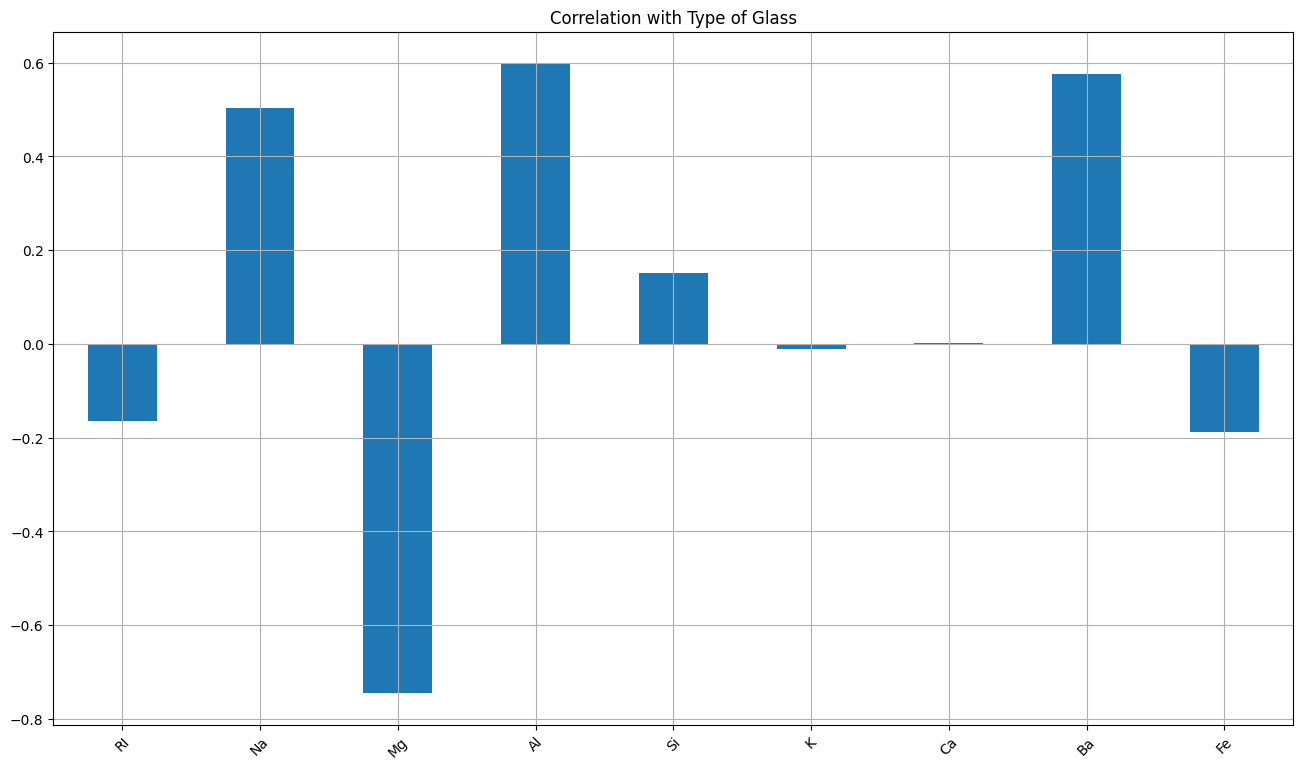

In [10]:
temp_data = data.drop(columns="Type")
temp_data.corrwith(data["Type"]).plot.bar(
    figsize = (16,9),
    title = "Correlation with Type of Glass",
    rot  = 45,
    grid = True
)

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

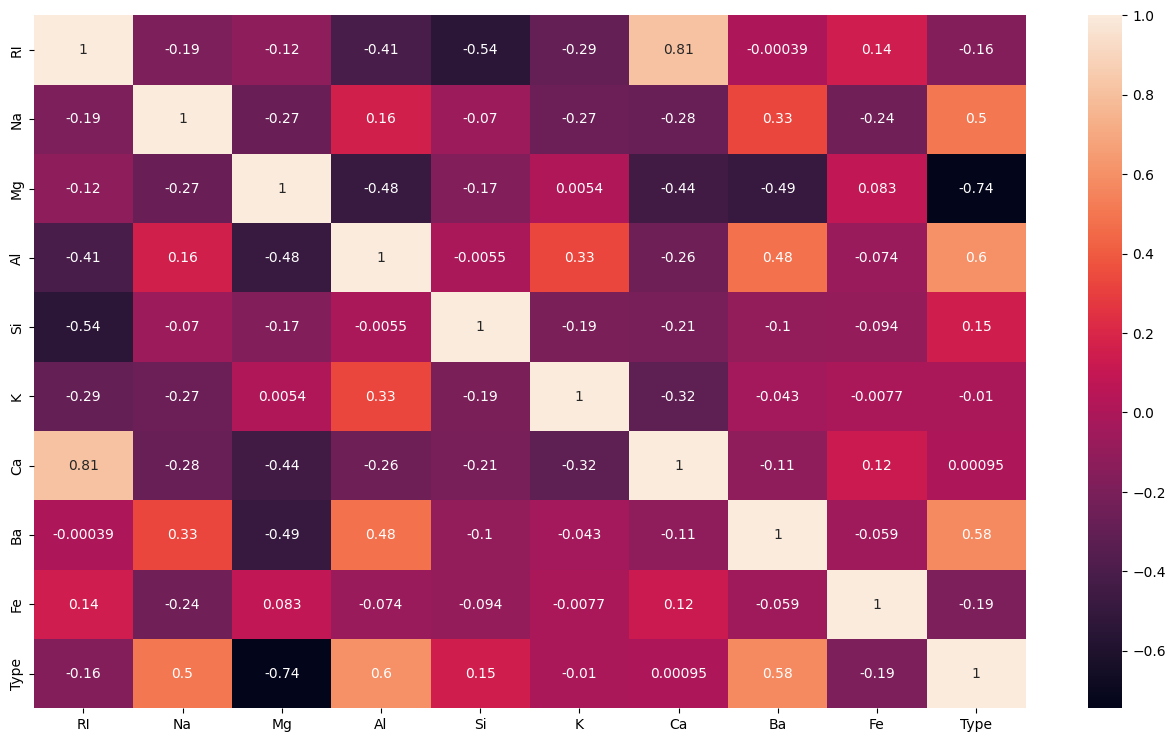

In [11]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.plot

# Train - Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape,y_train.shape

((171, 9), (171,))

In [14]:
x_test.shape,y_test.shape

((43, 9), (43,))

# Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

### 1. Using LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train,y_train)
y_pred = classifier_lr.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

In [18]:
result_1 = pd.DataFrame([["LogisticRegression",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

### 2. Using RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier_rm = RandomForestClassifier()
classifier_rm.fit(x_train,y_train)
y_pred = classifier_rm.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_rm,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

In [21]:
result_2 = pd.DataFrame([["RandomForestClassifier",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

### 3. Using GaussianNB

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier_gaussian = GaussianNB()
classifier_gaussian.fit(x_train,y_train)
y_pred = classifier_gaussian.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_gaussian,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

In [24]:
result_3 = pd.DataFrame([["GaussianNB",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

### 4. SVC

In [25]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(x_train,y_train)
y_pred = classifier_svc.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_svc,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

In [27]:
result_4 = pd.DataFrame([["SVC",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

### 5. KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train,y_train)
y_pred = classifier_knn.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_knn,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

In [30]:
result_5 = pd.DataFrame([["KNeighborsClassifier",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

### 6. Using DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(x_train,y_train)
y_pred = classifier_tree.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_tree,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

In [33]:
result_6 = pd.DataFrame([["DecisionTreeClassifier",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

# Model Evaluations

In [34]:
all_results = [result_1,result_2,result_3,result_4,result_5,result_6]
final_results = pd.concat(all_results).reset_index(drop=True)
final_results

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,LogisticRegression,0.372093,0.372093,0.372093,0.372093,56.666667,9.004676
1,RandomForestClassifier,0.651163,0.651163,0.651163,0.651163,80.065359,12.158444
2,GaussianNB,0.372093,0.372093,0.372093,0.372093,50.228758,15.541303
3,SVC,0.604651,0.604651,0.604651,0.604651,64.836601,10.675026
4,KNeighborsClassifier,0.604651,0.604651,0.604651,0.604651,64.248366,12.037683
5,DecisionTreeClassifier,0.558140,0.558140,0.558140,0.558140,71.928105,13.613337


# Final Model : RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

# Checking on some values

In [36]:
y_test = y_test.to_numpy()

In [37]:
y_test[0],y_pred[0]

(7, 7)

In [38]:
y_test[5],y_pred[5]

(2, 2)

In [39]:
y_test

array([7, 1, 2, 6, 5, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 7, 2, 1, 3, 3, 5, 2,
       7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 7, 2, 6, 2])

In [40]:
y_pred

array([7, 1, 2, 6, 5, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 7, 3, 2, 3, 2, 5, 1,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 7, 6, 2])